In [6]:
import os, sys
PACKAGE_ROOT = os.path.dirname(os.path.dirname(os.path.abspath("")))
print(PACKAGE_ROOT)
sys.path.insert(0, PACKAGE_ROOT)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from commons import constants as C
from utils.utils import get_connl_data
from preprocessing.prepare_connl_data import PrepareConnlData

c:\Users\sharm\Documents\nlp_assignment\ner-bilstm-crf
c:\Users\sharm\Documents\nlp_assignment\ner-bilstm-crf\src\util_scripts


In [7]:
train_df = get_connl_data("train")
valid_df = get_connl_data("valid")
test_df = get_connl_data("test")

In [8]:
def plot_dist(dist_values):
    sns.distplot(dist_values)
    # sns.histplot(dist_values, kde=True,stat="density", kde_kws=dict(cut=3))
    plt.show()

def show_info(df, split_type):
    print(f"Info for {split_type} data:")
    print(f"Number of tokens: {len(df.token.values)}")
    print(f"Number of unique tokens: {df.token.nunique()}")
    print(f"Number of sentences: {df.sentence_id.nunique()}")

    # plot_dist(df.groupby("sentence_id").agg(count=pd.NamedAgg(column="token", aggfunc="count")))
    

show_info(train_df, "TRAIN")
print("\n")
show_info(valid_df, "VALID")
print("\n")
show_info(test_df, "TEST")
print("\n")

Info for TRAIN data:
Number of tokens: 216285
Number of unique tokens: 29572
Number of sentences: 14352


Info for VALID data:
Number of tokens: 11556
Number of unique tokens: 4205
Number of sentences: 755


Info for TEST data:
Number of tokens: 3213986
Number of unique tokens: 199043
Number of sentences: 211527




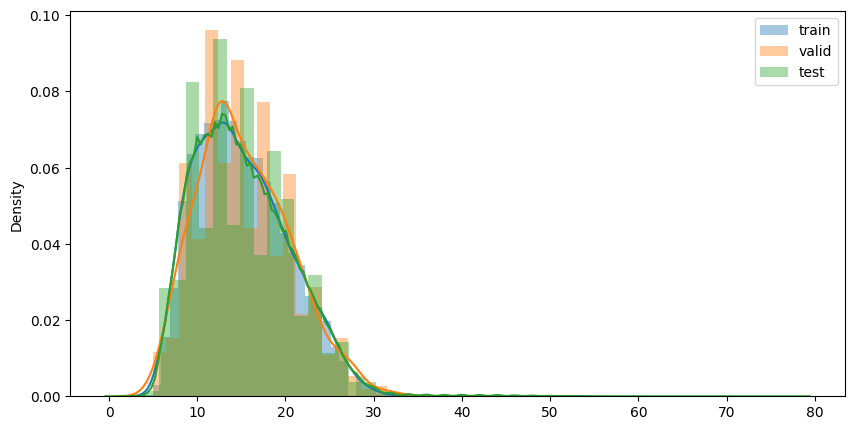

In [9]:
plt.figure(figsize=(10, 5))
sns.distplot(
    train_df.groupby("sentence_id").agg(count=pd.NamedAgg(column="token", aggfunc="count")), 
    label="train"
)
sns.distplot(
    valid_df.groupby("sentence_id").agg(count=pd.NamedAgg(column="token", aggfunc="count")), 
    label="valid"
)
sns.distplot(
    test_df.groupby("sentence_id").agg(count=pd.NamedAgg(column="token", aggfunc="count")), 
    label="test"
)
plt.legend()
plt.show()

In [10]:
# PrepareConnlData(C.TXT_CONNL_TRAIN_PATH, "train.csv").run()
# PrepareConnlData(C.TXT_CONNL_VALID_PATH, "valid.csv").run()
# PrepareConnlData(C.TXT_CONNL_TEST_PATH, "test.csv").run()

In [11]:
print(test_df.tag.value_counts().index)
print(len(test_df.tag.value_counts().index))

Index(['O', 'I-Artist', 'B-Artist', 'B-HumanSettlement', 'I-ORG',
       'I-VisualWork', 'I-WrittenWork', 'I-Facility', 'I-OtherPER',
       'I-MusicalWork', 'B-ORG', 'I-Athlete', 'B-Athlete', 'I-HumanSettlement',
       'B-OtherPER', 'B-VisualWork', 'I-Politician', 'I-SportsGRP',
       'B-Facility', 'B-WrittenWork', 'B-Politician', 'I-MusicalGRP',
       'B-MusicalWork', 'B-MusicalGRP', 'B-OtherPROD', 'B-SportsGRP',
       'I-Software', 'I-OtherLOC', 'B-Software', 'I-OtherPROD', 'I-Station',
       'B-PublicCorp', 'B-AnatomicalStructure', 'B-Vehicle', 'B-Disease',
       'B-Medication/Vaccine', 'I-Cleric', 'B-Station', 'B-Food',
       'I-Scientist', 'I-Vehicle', 'I-PublicCorp', 'B-OtherLOC',
       'I-SportsManager', 'B-Scientist', 'B-SportsManager', 'B-Cleric',
       'B-MedicalProcedure', 'I-Disease', 'B-CarManufacturer',
       'I-MedicalProcedure', 'I-ArtWork', 'B-Clothing',
       'I-AnatomicalStructure', 'B-Drink', 'I-Food', 'B-Symptom',
       'I-Medication/Vaccine', 'I-CarMa

In [12]:
print(train_df.tag.value_counts().index)
print(len(train_df.tag.value_counts().index))

Index(['O', 'I-Artist', 'B-Artist', 'B-HumanSettlement', 'I-ORG',
       'I-VisualWork', 'I-OtherPER', 'I-WrittenWork', 'B-OtherPER',
       'I-Facility', 'B-ORG', 'I-MusicalWork', 'I-Athlete', 'B-Athlete',
       'I-Politician', 'I-HumanSettlement', 'B-VisualWork', 'I-SportsGRP',
       'B-Facility', 'B-WrittenWork', 'B-Politician', 'I-MusicalGRP',
       'B-OtherPROD', 'B-MusicalGRP', 'B-MusicalWork', 'B-SportsGRP',
       'I-Software', 'B-Software', 'I-Station', 'I-OtherLOC', 'I-OtherPROD',
       'B-PublicCorp', 'I-ArtWork', 'B-AnatomicalStructure', 'B-Vehicle',
       'B-Disease', 'B-Medication/Vaccine', 'B-Station', 'I-Cleric',
       'I-Scientist', 'B-Food', 'I-Vehicle', 'I-PublicCorp', 'I-Disease',
       'B-Scientist', 'B-OtherLOC', 'I-SportsManager', 'B-SportsManager',
       'B-Cleric', 'B-MedicalProcedure', 'B-CarManufacturer',
       'B-AerospaceManufacturer', 'B-Clothing', 'B-Drink', 'B-Symptom',
       'B-PrivateCorp', 'B-ArtWork', 'I-AerospaceManufacturer',
       'I-Pr

In [13]:
print(valid_df.tag.value_counts().index)
print(len(valid_df.tag.value_counts().index))

Index(['O', 'I-Artist', 'B-Artist', 'I-VisualWork', 'B-HumanSettlement',
       'I-ORG', 'I-WrittenWork', 'I-OtherPER', 'I-MusicalWork', 'B-ORG',
       'B-OtherPER', 'I-HumanSettlement', 'I-Facility', 'B-VisualWork',
       'B-Athlete', 'I-Athlete', 'B-WrittenWork', 'B-MusicalWork',
       'B-Facility', 'B-OtherPROD', 'I-SportsGRP', 'I-Politician',
       'I-MusicalGRP', 'I-OtherPROD', 'B-SportsGRP', 'B-Politician',
       'I-OtherLOC', 'B-MusicalGRP', 'I-Software', 'B-Software',
       'B-PublicCorp', 'I-PublicCorp', 'I-Station', 'I-ArtWork', 'I-Disease',
       'B-Vehicle', 'I-Vehicle', 'B-Disease', 'B-Food', 'B-Medication/Vaccine',
       'B-AnatomicalStructure', 'B-Station', 'B-OtherLOC', 'I-Scientist',
       'B-Scientist', 'B-MedicalProcedure', 'B-CarManufacturer', 'B-ArtWork',
       'I-Cleric', 'B-Cleric', 'I-SportsManager', 'B-PrivateCorp', 'B-Symptom',
       'B-AerospaceManufacturer', 'B-Drink', 'B-SportsManager', 'B-Clothing',
       'I-MedicalProcedure', 'I-Food', 'I-Priv